In [17]:
import pandas as pd
from scipy import stats
import numpy as np
import json

In [18]:
df = pd.read_csv("../df_extended_v2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3869 entries, 0 to 3868
Columns: 108 entries, Unnamed: 0 to vj72.2h
dtypes: float64(3), int64(84), object(21)
memory usage: 3.2+ MB


In [19]:
with open("../Vex1cK/deleted_salary.json") as deld:
    deld = pd.Series(json.load(deld))
df = df[deld.tolist()]

In [20]:
df.head()

,Unnamed: 0,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,...,vj72.5h4,vj72.5h3,vj72.5h2,vj72.5h,vj72.4h2,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h
0,0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,...,NaN,NaN,Нет,Нет,NaN,NaN,NaN,NaN,NaN,NaN
2,2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,NaN,NaN
4,4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,...,NaN,NaN,NaN,Да,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
no_middle = df[df.education_level == 0]
middle = df[df.education_level == 1]
tech = df[df.education_level == 2]
high = df[df.education_level == 3]

Искл асперантуру и ординатуру тк в нашем датасете их мало и edu level == 4 нет


'vj72.6h2', 'vj72.6h', 'vj72.5h4', 'vj72.5h3', 'vj72.5h2', 'vj72.5h', 'vj72.4h2', 'vj72.4h', 'vj72.3h2', 'vj72.3h', 'vj72.2h2', 'vj72.2h'


In [22]:
no_middle["is_remote_no_middle"] = (no_middle["vj72.2h2"] == "Нет") | (
    no_middle["vj72.2h"] == "Нет"
)
no_middle.is_remote_no_middle.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_48462/298912832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_middle["is_remote_no_middle"] = (no_middle["vj72.2h2"] == "Нет") | (


is_remote_no_middle
False    311
True       2
Name: count, dtype: int64

In [23]:
middle["is_remote_middle"] = (middle["vj72.3h"] == "Нет") | (
    middle["vj72.3h2"] == "Нет"
)
middle.is_remote_middle.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_48462/3104733500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle["is_remote_middle"] = (middle["vj72.3h"] == "Нет") | (middle["vj72.3h2"] == "Нет")


is_remote_middle
False    1048
True        8
Name: count, dtype: int64

In [24]:
tech["is_remote_tech"] = (tech["vj72.5h2"] == "Нет") | (tech["vj72.5h2"] == "Нет")
tech.is_remote_tech.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_48462/2969389528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech["is_remote_tech"] = (tech["vj72.5h2"] == "Нет") | (tech["vj72.5h2"] == "Нет")


is_remote_tech
False    1026
True        6
Name: count, dtype: int64

In [25]:
high["is_remote_high"] = (
    (high["vj72.5h4"] == "Нет")
    | (high["vj72.5h3"] == "Нет")
    | (high["vj72.5h2"] == "Нет")
    | (high["vj72.5h"] == "Нет")
)
high.is_remote_high.value_counts()

/var/folders/g7/fsqf0_dj0t91wd65112c268r0000gn/T/ipykernel_48462/3751347811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high["is_remote_high"] = (


is_remote_high
False    738
True     540
Name: count, dtype: int64

In [26]:
high[high.is_remote_high == True].log_wage.median(), high[
    high.is_remote_high == False
].log_wage.median()

(10.03472, 10.01585)

In [72]:
stats.mannwhitneyu(
    high[high.is_remote_high == True].log_wage,
    high[high.is_remote_high == False].log_wage,
)

MannwhitneyuResult(statistic=202521.5, pvalue=0.6164001763148486)

<Axes: >

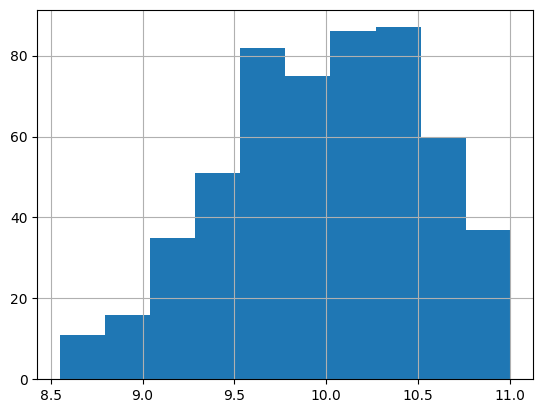

In [28]:
high[high.is_remote_high == True].log_wage.hist()

In [50]:
high.log_wage.median()

10.01585

In [51]:
no_middle.log_wage.median()

9.648127

In [29]:
high[high.is_remote_high == True].age.max()

59

<Axes: ylabel='Density'>

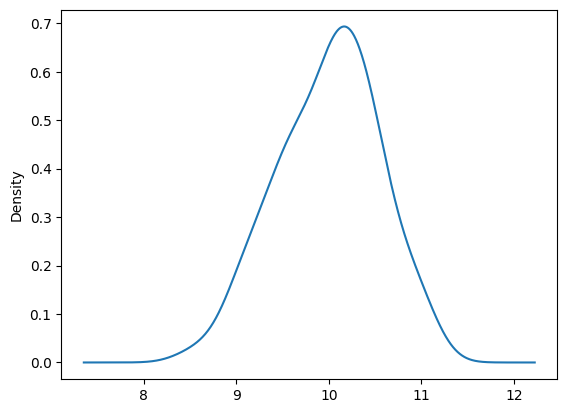

In [85]:
high[high.city_type == 'ПГТ']["log_wage"].plot(kind="density")

In [87]:
high[high.city_type == 'ПГТ'].is_urban.value_counts()

is_urban
1    75
Name: count, dtype: int64

In [61]:
high["log_wage"].median(), high["log_wage"].var()

(10.01585, 0.2851696665092855)

<Axes: ylabel='Density'>

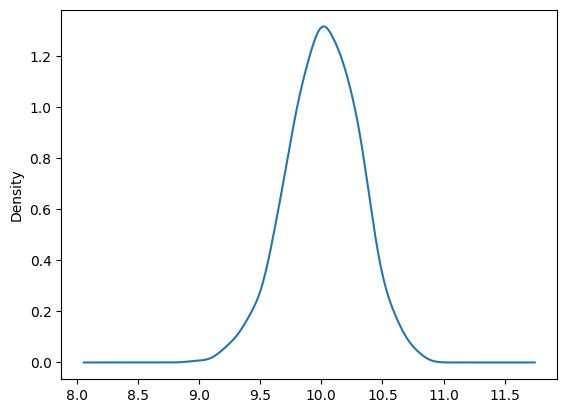

In [65]:
pd.Series(np.random.normal(10.01585, 0.2851696665092855, 1000)).plot(kind="density")

In [54]:
print("high:", stats.shapiro(high.log_wage))
print("tech:", stats.shapiro(tech.log_wage))
print("middle:", stats.shapiro(middle.log_wage))
print("no_middle:", stats.shapiro(no_middle.log_wage))

high: ShapiroResult(statistic=0.9840788245201111, pvalue=1.24285443048322e-10)
tech: ShapiroResult(statistic=0.9893903136253357, pvalue=8.574108960601734e-07)
middle: ShapiroResult(statistic=0.9892581105232239, pvalue=5.534767524295603e-07)
no_middle: ShapiroResult(statistic=0.984657347202301, pvalue=0.002024160698056221)


In [32]:
# df['is_remote'] = df.apply(lambda x: )

In [33]:
df = (
    df.merge(
        no_middle[["idind", "is_remote_no_middle"]],
        how="left",
        on="idind",
    )
    .merge(
        middle[["idind", "is_remote_middle"]],
        how="left",
        on="idind",
    )
    .merge(
        tech[["idind", "is_remote_tech"]],
        how="left",
        on="idind",
    )
    .merge(
        high[["idind", "is_remote_high"]],
        how="left",
        on="idind",
    )
)

In [34]:
df["is_remote"] = df[
    ["is_remote_no_middle", "is_remote_middle", "is_remote_tech", "is_remote_high"]
].apply(lambda row: True if any(row) else ())

In [35]:
df.apply(lambda x: print(x), axis=1)

Unnamed: 0                       0
idind                           37
region                 Волосовский
city_type                      ПГТ
age                             59
                          ...     
is_remote_no_middle            NaN
is_remote_middle             False
is_remote_tech                 NaN
is_remote_high                 NaN
is_remote                      NaN
Name: 0, Length: 113, dtype: object
Unnamed: 0                       1
idind                          122
region                 Волосовский
city_type                     Село
age                             40
                          ...     
is_remote_no_middle            NaN
is_remote_middle               NaN
is_remote_tech                 NaN
is_remote_high                True
is_remote                      NaN
Name: 1, Length: 113, dtype: object
Unnamed: 0                       2
idind                          125
region                 Волосовский
city_type                     Село
age               

0       None
1       None
2       None
3       None
4       None
        ... 
3674    None
3675    None
3676    None
3677    None
3678    None
Length: 3679, dtype: object

In [36]:
# def check(x: int):
#     all_nan = True
#     found_true = False
#     for i in row:
#         if i is not None:
#             all_nan = False
#             if i:
#                 found_true = True
#     if all_nan:
#         return None
#     return found_true
def check(row: list):
    all_nan = True
    found_true = False
    for i in row:
        if i is not np.nan:
            all_nan = False
            if i:
                found_true = True
    if all_nan:
        return np.nan
    return found_true

In [37]:
check([np.nan, np.nan, False])

False

In [38]:
df.head()

,Unnamed: 0,idind,region,city_type,age,is_male,industry,log_wage,is_gov,internet,...,vj72.4h,vj72.3h2,vj72.3h,vj72.2h2,vj72.2h,is_remote_no_middle,is_remote_middle,is_remote_tech,is_remote_high,is_remote
0,0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2,2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,...,NaN,NaN,Да,NaN,NaN,NaN,False,NaN,NaN,NaN
4,4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [39]:
df["is_remote"] = df[
    ["is_remote_no_middle", "is_remote_middle", "is_remote_tech", "is_remote_high"]
].apply(check, axis=1)

In [40]:
df = df.drop(
    ["is_remote_no_middle", "is_remote_middle", "is_remote_tech", "is_remote_high"],
    axis=1,
)

In [41]:
print(*df.columns)

Unnamed: 0 idind region city_type age is_male industry log_wage is_gov internet num_children is_urban education_level id1 id2 id3 id4 id5 id6 id7 id8 id9 id10 id11 id12 id13 id14 id15 id16 id17 id18 id19 id20 id21 id22 id23 id24 id25 id26 id27 id28 id29 id30 id31 id32 id33 id34 id35 id36 id37 id38 id39 id40 id41 id42 id43 id44 id45 id46 id47 id48 id49 id50 id51 id52 id53 id54 id55 id56 id57 id58 id59 id60 id61 id62 id63 id64 id65 id66 id67 id68 id69 id70 id71 id72 id73 id74 id75 job_satisfaction job_salary_satisfaction career_oportunities_satisfaction money_ladder power_ladder respect_ladder do_you_consume_alcohol did_you_drink_alcohol_in_last_30_days vj72.6h2 vj72.6h vj72.5h4 vj72.5h3 vj72.5h2 vj72.5h vj72.4h2 vj72.4h vj72.3h2 vj72.3h vj72.2h2 vj72.2h is_remote


In [42]:
df["is_remote"].isna().sum()

0

In [43]:
df.to_csv("../df_extended_v2_remote.csv")

In [44]:
df.is_remote.sum()

556

In [45]:
df[df["education_level"] != 3]["is_remote"].sum()

16

In [76]:
pgt = high[high.city_type == 'ПГТ']

In [83]:
print(*sorted(np.e**pgt.log_wage), sep='\n')

5276.999823718294
7746.372900837019
7746.372900837019
8607.076562622495
8865.299477982222
9467.791984323603
9467.791984323603
10328.49645279804
10328.49645279804
11189.207761432264
12049.916386318535
12910.626358810856
12910.626358810856
12910.626358810856
13082.75199431888
13427.041837620935
13771.327605973474
13943.461950466173
15492.743004304979
15492.743004304979
15492.743004304979
15492.743004304979
16697.74567880737
16869.878949074267
16955.948581473778
17214.150017058717
17214.150017058717
17297.651157061566
20743.121982761575
21517.675658319782
21517.675658319782
21517.675658319782
21517.675658319782
21517.675658319782
21517.675658319782
21689.856763597196
22378.36672544123
23239.065515942064
23497.28120417767
24099.828421172966
24099.828421172966
25821.17059171019
25821.17059171019
25821.17059171019
25821.17059171019
25821.17059171019
25821.17059171019
25821.17059171019
26681.881005515945
27542.622696210623
30124.67854407729
30124.67854407729
30124.67854407729
30985.3564721990

In [84]:
stats.shapiro(df.log_wage)

ShapiroResult(statistic=0.9888516068458557, pvalue=1.9512609638463666e-16)